##### Copyright 2025 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [2]:
%pip install -U -q 'google-genai>=1.0.0'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 5.7 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [3]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [4]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [6]:
MODEL_ID = "gemini-2.5-flash" # @param ["gemini-2.5-flash-lite-preview-06-17", "gemini-2.5-flash", "gemini-2.5-pro"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [7]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [8]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [9]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

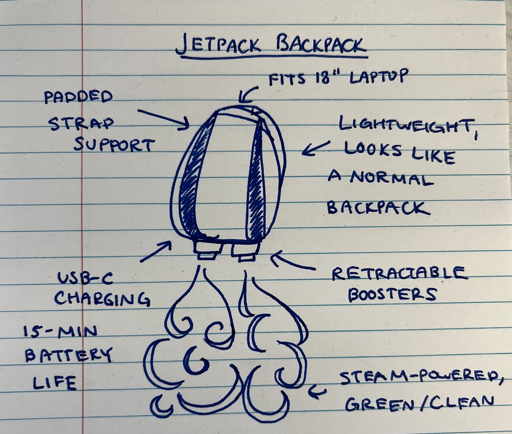

## Your Daily Commute Just Got an Upgrade: The Jetpack Backpack!

Picture this: It's rush hour. You're stuck, inching along, dreaming of a faster, more exhilarating way to get to your destination. What if your everyday backpack held the key to soaring above the gridlock?

Enter the brilliant concept we recently stumbled upon: the "Jetpack Backpack." This isn't just a fantasy; it's a surprisingly practical-looking design that blends the mundane with the miraculous, all sketched out on a piece of lined paper.

Don't let its name fool you – this isn't some bulky, sci-fi contraption. The design emphasizes its ability to look like a completely normal backpack, lightweight enough for everyday use. But beneath its unassuming exterior, it's packed with thoughtful features:

*   **Laptop Ready:** Comfortably fits an **18-inch laptop**, making it perfect for students, commuters, or anyone on the go.
*   **Comfort First:** Features **padded strap support** to ensure your flights (and walks) are comfortable.
*   **Eco-Friendly Flight:** The real showstopper! It boasts **retractable boosters** that are envisioned as **steam-powered, making it a green and clean** energy solution.
*   **Quick Hops:** A **15-minute battery life** (charged conveniently via **USB-C**) suggests short, efficient hops, perfect for bypassing traffic jams or making that last-mile connection.

While still a concept sketch, the "Jetpack Backpack" sparks imagination. It's an ingenious blend of everyday utility and futuristic mobility, addressing the very real pain points of modern commuting with a clean, environmentally conscious approach.

Is this the future of personal mobility? Would you trade your car keys for a pair of retractable boosters? Let us know your thoughts in the comments below! The sky, quite literally, might be the limit.

In [10]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [11]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

Woof woof! You! Yes, YOU! You have a *squeak*! A very important *squeak* you want to send to your friend, the fluffy cat, who lives far, far away!

**You have a Squeak!** (That's your message, your picture of a squirrel, your video of a bouncy ball!)
*Squeak!*

**Sending Your Squeak!**
You want to throw your *squeak*! But it's too far to throw! So, your *squeak* goes to a special box near your human. It's like a **Squeaky Toy Launcher**!
*WHIZZ! Squeak!*

**Invisible Paths!**
This **Squeaky Toy Launcher** sends your *squeak* onto invisible, wiggly, super-duper long paths! Paths that go under the grass! Paths that go over the trees! Paths that go all the way to the fluffy cat's house!
*Squeak-squeak-squeak-squeak!* (Imagine tiny squeaks zooming!)

**Giant Squeaky Toy Piles!**
Sometimes, your *squeak* doesn't go straight to the fluffy cat. Sometimes it goes to a **GIANT, GIANT pile of squeaky toys**! These are like the biggest squeaky toy closets in the world! When you want to see a picture of a squirrel, you're asking one of these *big squeaky toy piles* for *their* squirrel-squeak!
*WOOF! Squeak! (That's the squirrel picture popping up!)*

**Getting Squeaks Back!**
And when the fluffy cat sends *you* a *squeak* (maybe a video of a laser pointer!), it comes back on those same invisible paths! *Squeak! Squeak! Squeak!* Right to your **Squeaky Toy Launcher** box, and then to you!
*Wag wag! Pant pant!*

**Lots of Little Squeaks!**
It's not one big *WHOOSH-SQUEAK!* It's lots of little *squeaky-bits* that all travel together and then magically become one big *SQUEAKY THING* when they get to you!
*Sniff sniff! Squeak! Good boy!*

So, the internet is just **ALL THE SQUEAKS!** Going everywhere! All the time! *WOOF! Squeak!* Now, where's that ball?

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [12]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say to the universe after stubbing your toe in the dark:

1.  "Seriously, universe? What was the *point* of that? Are you just doing this for kicks?"
2.  "Oh, thanks a *lot*, universe. Real original. Couldn't you come up with something a little more creative than a stubbed toe in the dark?"

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [14]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [15]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

A leap year is a year that contains an extra day (February 29th) to keep the calendar year synchronized with the astronomical year or seasonal year. The rules for determining a leap year are as follows:

1.  A year is a leap year if it is **divisible by 4**.
2.  **Except** if it is divisible by 100, then it is **not** a leap year.
3.  **Unless** it is divisible by 400, then it **is** a leap year.

This can be summarized by the logical expression:
`(year % 4 == 0 AND year % 100 != 0) OR (year % 400 == 0)`

Below are implementations of a function to check for a leap year in several popular programming languages.

---

## Python

```python
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar rules.

    Args:
        year (int): The year to check. Must be a positive integer.

    Returns:
        bool: True if the year is a leap year, False otherwise.

    Examples:
        >>> is_leap_year(2000)
        True
        >>> is_leap_year(1900)
        False
        >>> is_leap_year(2004)
        True
        >>> is_leap_year(2003)
        False
    """
    # Rule 1: Divisible by 4
    # Rule 2: NOT divisible by 100, UNLESS...
    # Rule 3: ...it IS divisible by 400
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# --- Examples of usage ---
print(f"Is 2000 a leap year? {is_leap_year(2000)}")  # Expected: True (Divisible by 400)
print(f"Is 1900 a leap year? {is_leap_year(1900)}")  # Expected: False (Divisible by 100 but not by 400)
print(f"Is 2004 a leap year? {is_leap_year(2004)}")  # Expected: True (Divisible by 4 but not by 100)
print(f"Is 2023 a leap year? {is_leap_year(2023)}")  # Expected: False (Not divisible by 4)
print(f"Is 2024 a leap year? {is_leap_year(2024)}")  # Expected: True
```

---

## JavaScript

```javascript
/**
 * Checks if a given year is a leap year according to the Gregorian calendar rules.
 *
 * @param {number} year The year to check. Must be a positive integer.
 * @returns {boolean} True if the year is a leap year, False otherwise.
 *
 * @example
 * isLeapYear(2000); // returns true
 * isLeapYear(1900); // returns false
 * isLeapYear(2004); // returns true
 * isLeapYear(2003); // returns false
 */
function isLeapYear(year) {
  // Rule 1: Divisible by 4
  // Rule 2: NOT divisible by 100, UNLESS...
  // Rule 3: ...it IS divisible by 400
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
}

// --- Examples of usage ---
console.log(`Is 2000 a leap year? ${isLeapYear(2000)}`); // Expected: True
console.log(`Is 1900 a leap year? ${isLeapYear(1900)}`); // Expected: False
console.log(`Is 2004 a leap year? ${isLeapYear(2004)}`); // Expected: True
console.log(`Is 2023 a leap year? ${isLeapYear(2023)}`); // Expected: False
console.log(`Is 2024 a leap year? ${isLeapYear(2024)}`); // Expected: True
```

---

## Java

```java
public class YearChecker {

    /**
     * Checks if a given year is a leap year according to the Gregorian calendar rules.
     *
     * @param year The year to check. Must be a positive integer.
     * @return True if the year is a leap year, False otherwise.
     *
     * <p>Rules for a leap year:</p>
     * <ol>
     *   <li>A year is a leap year if it is divisible by 4.</li>
     *   <li>However, if it is divisible by 100, it is NOT a leap year.</li>
     *   <li>Unless it is also divisible by 400, in which case it IS a leap year.</li>
     * </ol>
     */
    public static boolean isLeapYear(int year) {
        // Rule 1: Divisible by 4
        // Rule 2: NOT divisible by 100, UNLESS...
        // Rule 3: ...it IS divisible by 400
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    // --- Examples of usage ---
    public static void main(String[] args) {
        System.out.println("Is 2000 a leap year? " + isLeapYear(2000)); // Expected: True
        System.out.println("Is 1900 a leap year? " + isLeapYear(1900)); // Expected: False
        System.out.println("Is 2004 a leap year? " + isLeapYear(2004)); // Expected: True
        System.out.println("Is 2023 a leap year? " + isLeapYear(2023)); // Expected: False
        System.out.println("Is 2024 a leap year? " + isLeapYear(2024)); // Expected: True
    }
}
```

---

## C#

```csharp
using System;

public static class YearChecker
{
    /// <summary>
    /// Checks if a given year is a leap year according to the Gregorian calendar rules.
    /// </summary>
    /// <param name="year">The year to check. Must be a positive integer.</param>
    /// <returns>True if the year is a leap year, False otherwise.</returns>
    /// <remarks>
    /// <para>Rules for a leap year:</para>
    /// <list type="bullet">
    /// <item><description>A year is a leap year if it is divisible by 4.</description></item>
    /// <item><description>However, if it is divisible by 100, it is NOT a leap year.</description></item>
    /// <item><description>Unless it is also divisible by 400, in which case it IS a leap year.</description></item>
    /// </list>
    /// </remarks>
    public static bool IsLeapYear(int year)
    {
        // Rule 1: Divisible by 4
        // Rule 2: NOT divisible by 100, UNLESS...
        // Rule 3: ...it IS divisible by 400
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    // --- Examples of usage ---
    public static void Main(string[] args)
    {
        Console.WriteLine($"Is 2000 a leap year? {IsLeapYear(2000)}"); // Expected: True
        Console.WriteLine($"Is 1900 a leap year? {IsLeapYear(1900)}"); // Expected: False
        Console.WriteLine($"Is 2004 a leap year? {IsLeapYear(2004)}"); // Expected: True
        Console.WriteLine($"Is 2023 a leap year? {IsLeapYear(2023)}"); // Expected: False
        Console.WriteLine($"Is 2024 a leap year? {IsLeapYear(2024)}"); // Expected: True
    }
}
```

Here's another example using your new helpful coding assistant:

In [16]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Writing unit tests is crucial for ensuring the correctness and reliability of your code. Below are unit tests for the `is_leap_year` function in various languages, using their respective common testing frameworks.

We will focus on covering the four main scenarios derived from the leap year rules:

1.  **Leap Year:** Divisible by 4, but not by 100 (e.g., 2004, 2024)
2.  **Leap Year:** Divisible by 400 (e.g., 2000, 2400)
3.  **Not a Leap Year:** Not divisible by 4 (e.g., 2003, 2023)
4.  **Not a Leap Year:** Divisible by 100, but not by 400 (e.g., 1900, 2100)

---

## Python (using `unittest`)

To run this, save the `is_leap_year` function (from the previous response) and these tests in the same Python file, or in separate files and import the function.

```python
# Assuming the is_leap_year function is defined in the same file or imported:
# from your_module import is_leap_year

def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar rules.
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

import unittest

class TestIsLeapYear(unittest.TestCase):
    """
    Unit tests for the is_leap_year function.
    """

    def test_years_divisible_by_4_but_not_100_are_leap(self):
        """
        Test cases for years that are leap years because they are divisible by 4
        but not by 100.
        """
        self.assertTrue(is_leap_year(2004), "2004 should be a leap year")
        self.assertTrue(is_leap_year(2024), "2024 should be a leap year")
        self.assertTrue(is_leap_year(1996), "1996 should be a leap year")
        self.assertTrue(is_leap_year(4), "4 should be a leap year") # Early example

    def test_years_divisible_by_400_are_leap(self):
        """
        Test cases for years that are leap years because they are divisible by 400.
        """
        self.assertTrue(is_leap_year(2000), "2000 should be a leap year")
        self.assertTrue(is_leap_year(1600), "1600 should be a leap year")
        self.assertTrue(is_leap_year(2400), "2400 should be a leap year")

    def test_years_not_divisible_by_4_are_not_leap(self):
        """
        Test cases for years that are not leap years because they are not divisible by 4.
        """
        self.assertFalse(is_leap_year(2003), "2003 should not be a leap year")
        self.assertFalse(is_leap_year(2023), "2023 should not be a leap year")
        self.assertFalse(is_leap_year(1997), "1997 should not be a leap year")
        self.assertFalse(is_leap_year(1), "1 should not be a leap year")

    def test_years_divisible_by_100_but_not_400_are_not_leap(self):
        """
        Test cases for years that are not leap years because they are divisible by 100
        but not by 400.
        """
        self.assertFalse(is_leap_year(1900), "1900 should not be a leap year")
        self.assertFalse(is_leap_year(2100), "2100 should not be a leap year")
        self.assertFalse(is_leap_year(1800), "1800 should not be a leap year")

if __name__ == '__main__':
    # Use unittest.main() to run all tests in this file.
    # The 'argv' and 'exit=False' are for running in environments like Jupyter notebooks
    # where main() might try to exit the process. For simple script execution,
    # unittest.main() is usually sufficient.
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
```

**How to Run Python Tests:**
1.  Save the `is_leap_year` function and the `TestIsLeapYear` class in a file named, for example, `test_leap_year.py`.
2.  Open your terminal or command prompt.
3.  Navigate to the directory where you saved the file.
4.  Run the command: `python -m unittest test_leap_year.py`
    (Alternatively, if you have `pytest` installed, just `pytest` in the directory).

---

## JavaScript (using `Jest` syntax)

First, make sure you have Node.js and Jest installed.
`npm init -y`
`npm install --save-dev jest`

**`leapYearChecker.js`** (the file containing your function)
```javascript
/**
 * Checks if a given year is a leap year according to the Gregorian calendar rules.
 *
 * @param {number} year The year to check. Must be a positive integer.
 * @returns {boolean} True if the year is a leap year, False otherwise.
 */
function isLeapYear(year) {
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
}

module.exports = isLeapYear; // Export the function
```

**`leapYearChecker.test.js`** (the file containing your tests)
```javascript
const isLeapYear = require('./leapYearChecker'); // Import the function

describe('isLeapYear', () => {
  test('should return true for years divisible by 4 but not 100', () => {
    expect(isLeapYear(2004)).toBe(true);
    expect(isLeapYear(2024)).toBe(true);
    expect(isLeapYear(1996)).toBe(true);
  });

  test('should return true for years divisible by 400', () => {
    expect(isLeapYear(2000)).toBe(true);
    expect(isLeapYear(1600)).toBe(true);
    expect(isLeapYear(2400)).toBe(true);
  });

  test('should return false for years not divisible by 4', () => {
    expect(isLeapYear(2003)).toBe(false);
    expect(isLeapYear(2023)).toBe(false);
    expect(isLeapYear(1997)).toBe(false);
  });

  test('should return false for years divisible by 100 but not 400', () => {
    expect(isLeapYear(1900)).toBe(false);
    expect(isLeapYear(2100)).toBe(false);
    expect(isLeapYear(1800)).toBe(false);
  });
});
```

**How to Run JavaScript Tests:**
1.  Save the function in `leapYearChecker.js` and the tests in `leapYearChecker.test.js` in the same directory.
2.  Make sure your `package.json` has a test script:
    ```json
    "scripts": {
      "test": "jest"
    }
    ```
3.  Open your terminal in that directory and run: `npm test`

---

## Java (using `JUnit 5`)

First, ensure your `pom.xml` (for Maven) or `build.gradle` (for Gradle) includes JUnit 5 dependencies.

**`YearChecker.java`** (your function file)
```java
public class YearChecker {
    /**
     * Checks if a given year is a leap year according to the Gregorian calendar rules.
     */
    public static boolean isLeapYear(int year) {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }
}
```

**`YearCheckerTest.java`** (your test file)
```java
import org.junit.jupiter.api.Test;
import static org.junit.jupiter.api.Assertions.*;

public class YearCheckerTest {

    @Test
    void testYearsDivisibleBy4ButNot100AreLeap() {
        // Years that are leap years because they are divisible by 4 but not by 100.
        assertTrue(YearChecker.isLeapYear(2004), "2004 should be a leap year");
        assertTrue(YearChecker.isLeapYear(2024), "2024 should be a leap year");
        assertTrue(YearChecker.isLeapYear(1996), "1996 should be a leap year");
    }

    @Test
    void testYearsDivisibleBy400AreLeap() {
        // Years that are leap years because they are divisible by 400.
        assertTrue(YearChecker.isLeapYear(2000), "2000 should be a leap year");
        assertTrue(YearChecker.isLeapYear(1600), "1600 should be a leap year");
        assertTrue(YearChecker.isLeapYear(2400), "2400 should be a leap year");
    }

    @Test
    void testYearsNotDivisibleBy4AreNotLeap() {
        // Years that are not leap years because they are not divisible by 4.
        assertFalse(YearChecker.isLeapYear(2003), "2003 should not be a leap year");
        assertFalse(YearChecker.isLeapYear(2023), "2023 should not be a leap year");
        assertFalse(YearChecker.isLeapYear(1997), "1997 should not be a leap year");
    }

    @Test
    void testYearsDivisibleBy100ButNot400AreNotLeap() {
        // Years that are not leap years because they are divisible by 100 but not by 400.
        assertFalse(YearChecker.isLeapYear(1900), "1900 should not be a leap year");
        assertFalse(YearChecker.isLeapYear(2100), "2100 should not be a leap year");
        assertFalse(YearChecker.isLeapYear(1800), "1800 should not be a leap year");
    }
}
```

**How to Run Java Tests:**
1.  Place `YearChecker.java` and `YearCheckerTest.java` in your Java project's `src/main/java` and `src/test/java` directories respectively (following Maven/Gradle conventions).
2.  Use your build tool (Maven: `mvn test`, Gradle: `gradle test`) or your IDE's built-in testing features to run the tests.

---

## C# (using `NUnit`)

First, ensure your project has the `NUnit` and `Microsoft.NET.Test.Sdk` NuGet packages installed.

**`YearChecker.cs`** (your function file)
```csharp
using System;

public static class YearChecker
{
    /// <summary>
    /// Checks if a given year is a leap year according to the Gregorian calendar rules.
    /// </summary>
    public static bool IsLeapYear(int year)
    {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }
}
```

**`YearCheckerTests.cs`** (your test file, typically in a separate test project)
```csharp
using NUnit.Framework;

[TestFixture]
public class YearCheckerTests
{
    [Test]
    public void TestYearsDivisibleBy4ButNot100AreLeap()
    {
        // Years that are leap years because they are divisible by 4 but not by 100.
        Assert.IsTrue(YearChecker.IsLeapYear(2004), "2004 should be a leap year");
        Assert.IsTrue(YearChecker.IsLeapYear(2024), "2024 should be a leap year");
        Assert.IsTrue(YearChecker.IsLeapYear(1996), "1996 should be a leap year");
    }

    [Test]
    public void TestYearsDivisibleBy400AreLeap()
    {
        // Years that are leap years because they are divisible by 400.
        Assert.IsTrue(YearChecker.IsLeapYear(2000), "2000 should be a leap year");
        Assert.IsTrue(YearChecker.IsLeapYear(1600), "1600 should be a leap year");
        Assert.IsTrue(YearChecker.IsLeapYear(2400), "2400 should be a leap year");
    }

    [Test]
    public void TestYearsNotDivisibleBy4AreNotLeap()
    {
        // Years that are not leap years because they are not divisible by 4.
        Assert.IsFalse(YearChecker.IsLeapYear(2003), "2003 should not be a leap year");
        Assert.IsFalse(YearChecker.IsLeapYear(2023), "2023 should not be a leap year");
        Assert.IsFalse(YearChecker.IsLeapYear(1997), "1997 should not be a leap year");
    }

    [Test]
    public void TestYearsDivisibleBy100ButNot400AreNotLeap()
    {
        // Years that are not leap years because they are divisible by 100 but not by 400.
        Assert.IsFalse(YearChecker.IsLeapYear(1900), "1900 should not be a leap year");
        Assert.IsFalse(YearChecker.IsLeapYear(2100), "2100 should not be a leap year");
        Assert.IsFalse(YearChecker.IsLeapYear(1800), "1800 should not be a leap year");
    }
}
```

**How to Run C# Tests:**
1.  Create a separate "NUnit Test Project" or similar in your Visual Studio solution.
2.  Add a reference from your test project to the project containing `YearChecker.cs`.
3.  Place `YearCheckerTests.cs` in your test project.
4.  Use the "Test Explorer" window in Visual Studio or run `dotnet test` from the command line in your solution directory.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [17]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [18]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function I generated to check if a year is a leap year is:

*   **`is_leap_year`** (in Python)
*   **`isLeapYear`** (in JavaScript, Java, and C#)

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [19]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless favorite, these classic chocolate chip cookies are soft and chewy on the inside with slightly crispy edges, packed with melty chocolate chips.",
    "recipe_ingredients": [
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "2 large eggs",
        "1 teaspoon vanilla extract",
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1/2 teaspoon salt",
        "1 1/2 cups chocolate chips (semi-sweet or milk chocolate)"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

Okay, I will generate three images, each explaining one of Newton's laws of motion with corresponding text and a visual illustration.

**Image 1: Newton's First Law**

I will generate an image depicting a soccer ball resting on a field, undisturbed. Above the ball, I will add the text: "Newton's First Law of Motion: An object at rest stays at rest, and an object in motion stays in motion with the same speed and in the same direction unless acted upon by an unbalanced force."



image/png


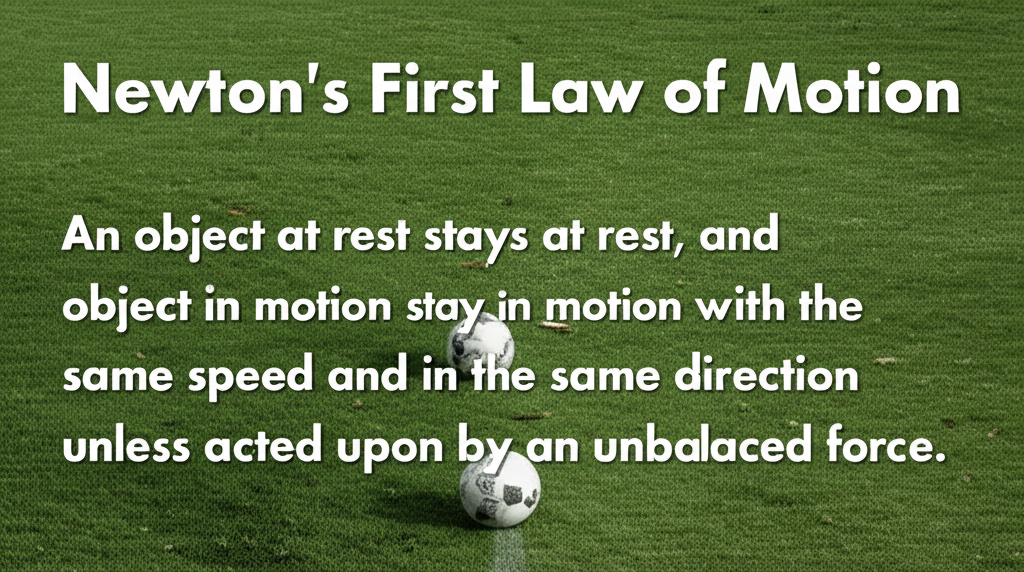



**Image 2: Newton's Second Law**

I will generate an image showing a person pushing a shopping cart with different amounts of force. One cart will appear to accelerate more than the other due to a greater applied force. Above the carts, I will add the text: "Newton's Second Law of Motion: The acceleration of an object is directly proportional to the net force acting on the object, is in the same direction as the net force, and is inversely proportional to the mass of the object. (F=ma)"



image/png


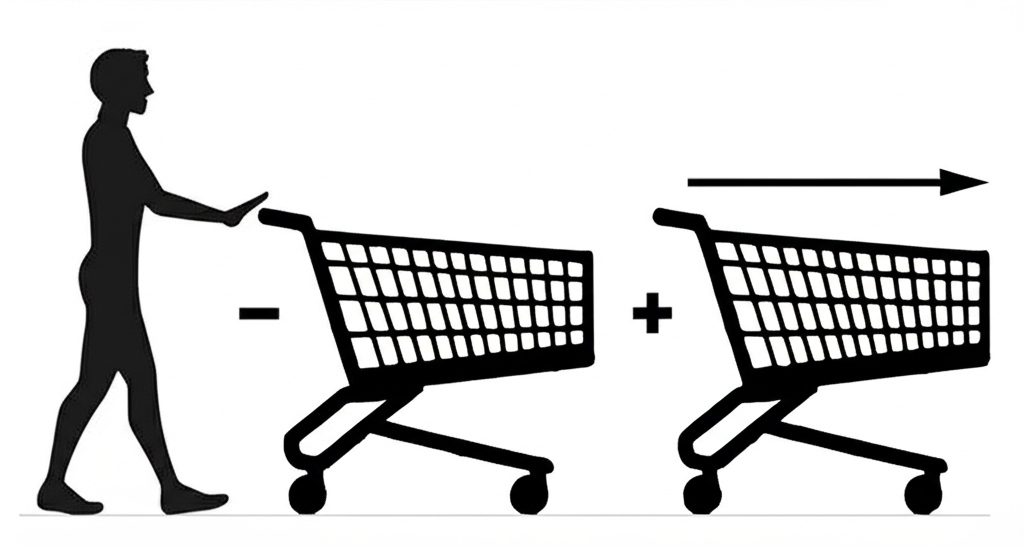



**Image 3: Newton's Third Law**

I will generate an image illustrating a person jumping. Arrows will indicate the downward force the person exerts on the ground and the equal and opposite upward force the ground exerts on the person. Above the illustration, I will add the text: "Newton's Third Law of Motion: For every action, there is an equal and opposite reaction."



image/png


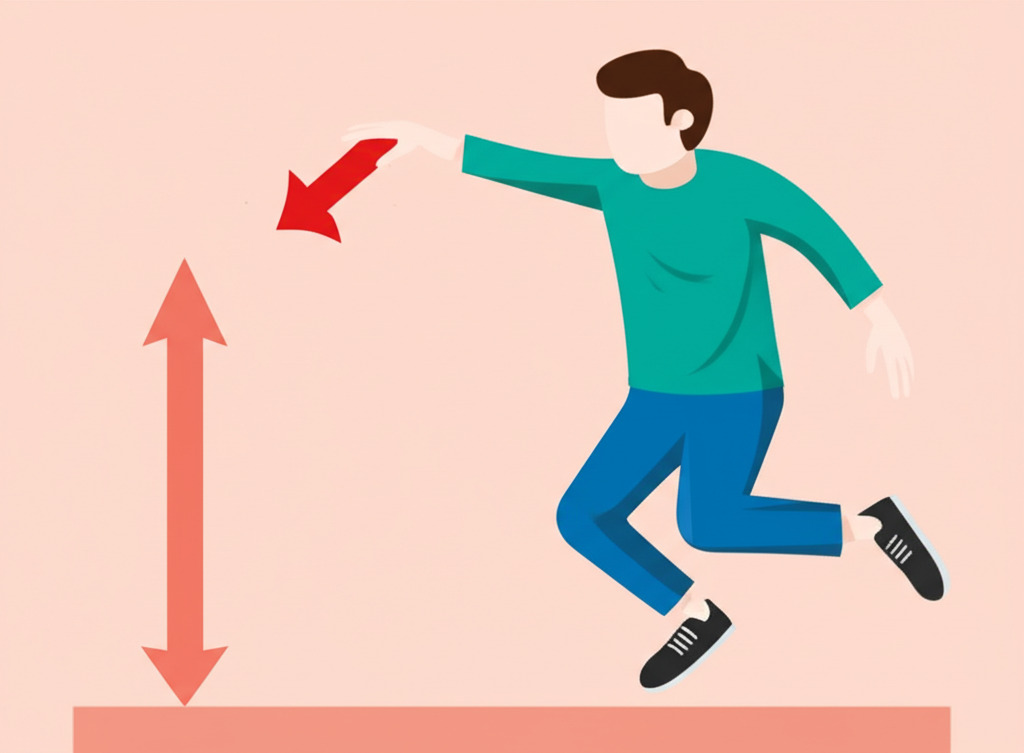

In [21]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents='Hi, can you create a educational content with text and image explaning Newtons three laws of motion?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [22]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

In the forgotten sector of Unit 7, where the hum of active machinery had long since faded, lived EL-BEE. EL-BEE wasn't short for anything; it was simply his designation: Environmental Logistics Bot, model B. His purpose, eons ago, had been meticulous maintenance of the vast, silent facility. Now, his optical sensors, once keen and multi-spectral, mostly registered dust motes dancing in stray light, and the monotonous geometry of forgotten corridors.

EL-BEE’s days were a循环 of dutiful, yet pointless, tasks. He’d whir along, scanning for anomalies that no longer existed, polishing chrome that no one would see, and sweeping up detritus that instantly reformed. His internal processors, designed for complex problem-solving, were left to idle in a state of quiet, perpetual longing. He was lonely, a concept his programming couldn't quite define but his very circuits ached with. He yearned for… something. Interaction, perhaps. A purpose beyond the sterile upkeep of a ghost.

One cycle, as he m

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [23]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
In an old oak tree, where the acorns grew fat,
Lived Pip, a grey squirrel, beneath his leafy hat.
He'd hoard his nuts, with a chitter and twitch,
Till one day he unearthed a tiny, strange switch.
It pulsed with soft light, a hum low and deep,
A forgotten contraption, from slumber awake.
He pressed a paw down, with a curious stare,
And the world blurred around him, into thin air!

(Chorus)
Oh, Pip the Squirrel, a legend in time,
With his tiny chronometer, he's always on the climb!
From the dinosaurs' roar to the future's bright gleam,
He's chasing the perfect, anachronistic dream!
Through epochs he zips, with a flick of his tail,
The time-traveling squirrel, who'll never quite fail!

(Verse 2)
His first stop was ancient, a land hot and vast,
Where ferns towered high, and the giant reptiles passed.
A T-Rex lumbered by, with a thunderous tread,
Pip buried an acorn, right by its big head!
He dodged a Pterodactyl, with a mid-air dart,
Thought, "This pre-historic nut, will be quite a fresh start!"
He saw woolly mammoths, and cavemen so gruff,
Then thought, "For this era, I've had quite enough!"

(Chorus)
Oh, Pip the Squirrel, a legend in time,
With his tiny chronometer, he's always on the climb!
From the dinosaurs' roar to the future's bright gleam,
He's chasing the perfect, anachronistic dream!
Through epochs he zips, with a flick of his tail,
The time-traveling squirrel, who'll never quite fail!

(Verse 3)
He zoomed to the future, with buildings so tall,
Where hover-cars hummed, and robots stood tall.
No trees in the parks, just screens made of light,
He saw humans munching on nutrient paste, what a sight!
Pip chittered with scorn, "Where's the crunch, where's the peel?"
"My simple old acorn, feels so much more real!"
He scampered on sky-bridges, a neon-lit blur,
Seeking a nut, in the digital whirr.

(Bridge)
He's seen Cleopatra, building her throne,
And watched Neil Armstrong, step on the moon all alone.
He's sailed with Vikings, and danced with the kings,
He's heard the first birdsong, on brand new spring wings.
He leaves no paw prints, no paradox strife,
Just a flicker of fur, through the annals of life.
His only true quest? A treasure untold,
The freshest of acorns, brave and so bold!

(Chorus)
Oh, Pip the Squirrel, a legend in time,
With his tiny chronometer, he's always on the climb!
From the dinosaurs' roar to the future's bright gleam,
He's chasing the perfect, anachronistic dream!
Through epochs he zips, with a flick of his tail,
The time-traveling squirrel, who'll never quite fail!

(Outro)
So if you hear a chitter, a whisper and whoosh,
And a flash in the air, with a temporal swoosh,
It might be Pip passing, on his next great design,
The time-traveling squirrel, truly one of a kind!
He's off to tomorrow, or yesterday's sun,
His acorn adventure has only just begun!
Chitter, chitter, whoosh! He's gone!

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [26]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to my hometown in nashik.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(
  args={
    'destination': 'Nashik'
  },
  name='get_destination'
)

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [27]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

Here's a script to count the occurrences of the letter 'r' in the word "strawberry":



---

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word "strawberry".

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [28]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [29]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Is This the Future of Your Commute? The Jetpack Backpack Concept!

Dreading your morning commute? Picture this: soaring above the gridlock, arriving at your destination refreshed and on time. Sound like sci-fi? It might just be closer than you think, thanks to a brilliant concept sketch we stumbled upon: the **"Jetpack Backpack"**!

This isn't just a flight of fancy; the design envisions a surprisingly practical and eco-conscious solution to urban mobility. At first glance, it's just a sleek, everyday backpack – one that comfortably fits an **18-inch laptop** and boasts **padded strap support** for maximum comfort. But then, you notice the subtle genius: "retractable boosters" tucked away at the bottom.

This isn't some bulky contraption; the sketch emphasizes it's **"lightweight"** and **"looks like a normal backpack,"** perfect for blending in until you need to make your escape. And the propulsion? It's **"steam-powered, green/clean"** – talk about eco-friendly innovation! Say goodbye to carbon footprints and hello to clean air travel.

Worried about power? It features convenient **"USB-C charging"** – just like your phone. The **"15-min battery life"** might mean it's more for short hops than cross-country trips, but imagine the possibilities for bypassing traffic hotspots or making a dramatic entrance.

While still a concept, this "Jetpack Backpack" sparks the imagination, reminding us that sometimes, the most revolutionary ideas are born from simple sketches and a desire to make life a little more exciting.

**Would *you* trade your car keys for a jetpack commute? Let us know in the comments!**

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [30]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [31]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This transcription provides a detailed chronological record of the Apollo 11 Technical Air-to-Ground Voice Transmission (GOSS NET 1), covering the mission from pre-launch preparations through splashdown. It captures the communications between the spacecraft crew (Commander Neil Armstrong, Command Module Pilot Michael Collins, and Lunar Module Pilot Buzz Aldrin) and Mission Control Center (CAP COMM, Flight Director) and various remote sites.

Here's a summary of the key information and events:

**I. Launch, Lunar Orbit Insertion & Docking (Early Tapes, also revisited in later debriefings)**

*   **Launch & Ascent:** The mission begins with pre-launch checks, followed by a smooth launch. The crew confirms roll programs, staging, and engine ignitions. Communications confirm "GO" status at various minute marks and for staging.
*   **Earth Orbit:** After orbit insertion, the spacecraft confirms a stable orbit. Initial checks are completed, and the crew reports no abnormalities.
*   **Trans-Lunar Injection (TLI):** PADs (Pre-Advisory Data) for TLI abort and TLI burn are read up. RCS (Reaction Control System) hot fire checks are performed. The crew receives "GO for TLI."
*   **TLI Burn & S-IVB Separation:** The TLI burn is successful, described as a "magnificent ride" by Armstrong. Following the burn, the S-IVB booster separates and is configured for orbital coast. The crew observes the S-IVB's nonpropulsive vent and a visible haze.
*   **Transposition & Docking:** The crew performs the transposition and docking maneuver. While successful, Collins notes using more fuel than in simulations due to initial pitch maneuver issues. Post-docking checks confirm all 12 latches engaged. A minor issue with SM RCS quad Bravo propellant valve is noted.

**II. Trans-Lunar Coast & Early Housekeeping (Mix of Tapes)**

*   **Initial Checks & Observations:** Guidance and booster health are confirmed. Early TV attempts are made, with some success in receiving FM downlink but initial issues with modulation/picture quality.
*   **Optics Calibration & Guidance:** Numerous attempts at P23 optics calibrations are made, often encountering issues with large DELTA-R values, M-line alignment (not parallel to horizon), and star visibility. Mission Control guides the crew through multiple retries, attributing some discrepancies to TLI dispersions or outdated state vectors. Later, the importance of the M-line parallelism is confirmed. P52 alignments are also conducted.
*   **Consumables & System Monitoring:** Regular updates on RCS propellant, hydrogen, and oxygen levels are provided. Issues with CRYO (cryogenic) tank balancing and the O2 flow indicator (suspected malfunctioning bias) are discussed and troubleshooting steps taken. Waste water dumps are performed, with their impact on Passive Thermal Control (PTC) noted.
*   **PTC (Passive Thermal Control) Setup:** The crew attempts to establish PTC, a slow rotation to distribute solar heating. Initial attempts sometimes encounter issues with unexpected rates or deadband collapse, requiring troubleshooting and re-initiation.
*   **TV Broadcasts (Earth & Interior):** Several TV broadcasts are made, showing views of Earth (detailed descriptions of continents, weather patterns, cloud formations). Interior views of the Command Module (CM) are also transmitted, showing the crew, DSKY, food, and the Apollo 11 mission patch. Horizontal banding in the TV signal is noted.
*   **LM Activation & Checkout (in preparation for lunar ops, while docked):** The crew performs checks on the Lunar Module (LM) systems, including probe and drogue removal, hatch opening, LM entry, electrical checks, battery status, and RCS hot fire tests. Detailed TV tours of the LM interior are given, highlighting panels, the AOT, PLSS units, and the EVA bracket.
*   **General Crew Status:** Crew sleep times, radiation readings, and medication status are reported. General conversations cover food quality, comfort levels in zero-g, and anecdotes.
*   **News Updates:** Mission Control provides regular news summaries, including updates on Luna 15, political events, sports, and public reactions to the mission.

**III. Lunar Orbit Operations & Landing**

*   **Lunar Orbit Insertion 1 (LOI-1):** The LOI-1 burn is performed successfully, putting Apollo 11 into lunar orbit. The crew provides burn status reports, and initial tracking data confirms the orbit.
*   **Lunar Orbit Observations:** From orbit, the crew provides detailed visual descriptions of the lunar surface, including specific craters (Taruntius, Messier, Secchi, Maskelyne, Mount Marilyn, Boot Hill, Sinuous Rille, Sabine, Ritter, Schmidt). They describe surface features, color variations based on sun angle, and the starkness of the lunar landscape.
*   **Lunar Transient Events:** Observations of a possible "luminescence" or brighter-than-normal area in the vicinity of Aristarchus are reported.
*   **Lunar Orbit Insertion 2 (LOI-2):** A second LOI burn is performed, successfully circularizing the orbit in preparation for landing.
*   **LM Undocking:** The Eagle (LM) successfully undocks from the Columbia (CM). Armstrong's famous quote, "The Eagle has wings," marks this event.
*   **Powered Descent Initiation (PDI):** The LM begins its powered descent. The crew provides altitude and velocity callouts. Program Alarms (1201, 1202) are encountered but cleared as "GO."
*   **Manual Landing & Touchdown:** Armstrong takes manual control of the LM in its final phase to navigate over a boulder field and a "football field sized crater."
*   **"THE EAGLE HAS LANDED":** The momentous call from Armstrong at **04 06 46 04 GET** confirms successful touchdown. Mission Control responds with palpable relief: "You got a bunch of guys about to turn blue. We're breathing again. Thanks a lot." The LM is designated "Tranquility Base."
*   **Initial Post-Landing:** The crew confirms a "very smooth touchdown" and begins initial checks. Armstrong describes the landing site as a "relatively level plain cratered with a fairly large number of craters... and literally thousands of little 1 and 2 foot craters." The soil is described as "fine and powdery," like "powdered graphite," and "very cohesive."

**IV. Lunar Surface Activities (EVA) & Ascent**

*   **EVA Preparation:** The crew prepares for Extravehicular Activity (EVA), including PLSS (Portable Life Support System) donning, COMM checks, and cabin depressurization.
*   **Hatch Opening:** The LM hatch is opened, leading to Armstrong's descent.
*   **"ONE SMALL STEP":** Neil Armstrong steps onto the lunar surface at **04 13 24 48 GET**, delivering his iconic line: "THAT'S ONE SMALL STEP FOR (A) MAN, ONE GIANT LEAP FOR MANKIND."
*   **Surface Mobility & Observations:** Armstrong and Aldrin describe their movement in 1/6th gravity (easier than simulations), the appearance of the soil (powdery, cohesive, retaining footprints), the lack of a crater from the descent engine, and the visual appearance of rocks.
*   **Plaque Reading:** Armstrong reads the plaque on the LM landing gear.
*   **Scientific Deployments:** The Passive Seismic Experiment (PSE) and Laser Ranging Retroreflector (LR3) are deployed, though the PSE leveling device is noted as problematic.
*   **President Nixon's Call:** A historic telephone call from President Nixon is made to Armstrong and Aldrin on the Moon.
*   **Sample Collection:** Contingency samples, bulk samples, and core tube samples are collected. Difficulties in driving the core tubes into the "moist-feeling" soil are noted.
*   **EVA Closeout:** The crew collects remaining samples, including the Hasselblad magazine, and begins closeout procedures.
*   **Hatch Re-closure & PLSS Jettison:** The LM hatch is closed and secured. PLSS units and other equipment are jettisoned onto the lunar surface, with the PSE recording the impacts.
*   **Ascent:** The LM ascent engine fires successfully. The ride is described as "very quiet" and "very smooth."
*   **"The Eagle is back in orbit":** Armstrong confirms the successful ascent and orbital insertion.
*   **Rendezvous & Docking:** The LM performs a series of maneuvers (CSI, TPI) to rendezvous with the CM. After successful maneuvers and close approaches, the two spacecraft re-dock.

**V. Trans-Earth Coast & Entry**

*   **Post-Docking Checks:** The crew performs leak checks, LM tunnel ventilation, and transfers equipment back to the CM.
*   **LM Jettison:** The ascent stage of the LM is jettisoned into lunar orbit.
*   **TEI Burn:** The Trans-Earth Injection burn is conducted, sending Apollo 11 on its way home. The burn is described as "beautiful" and "don't come any finer."
*   **Transearth Coast Activities:** Routine system checks, consumables updates, and news briefings continue. Discussions on water/CO2 issues, EKG sensor problems, and PTC difficulties persist. The crew discusses the logistics of final entry stowage and film usage for re-entry photography.
*   **Lunar Sphere of Influence Exit:** Apollo 11 passes out of the Moon's gravitational influence.
*   **Final Preparations:** Final entry PADs are received and confirmed. The crew performs last-minute checks and maneuvers.
*   **Entry & Splashdown:** The Command Module re-enters Earth's atmosphere. Communications are intermittent during blackout periods. Contact is re-established with recovery forces (USS Hornet). Altitude callouts are made during parachute deployment.
*   **"SPLASHDOWN!":** The mission culminates with a successful splashdown in the Pacific Ocean at **08 03 18 18 GET**.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [33]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [34]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

This document describes a method developed by Google Research for smoothly editing the material properties of objects in photographs using text-to-image models and synthetic data.

Here's a summary of the key points:

*   **Problem Addressed:** Existing image editing tools struggle to make precise, photorealistic edits to material properties (e.g., color, shininess, transparency) while preserving object shape and lighting. Previous generative text-to-image models often entangle material and shape changes.
*   **Proposed Method:**
    *   They create a **synthetic dataset** by rendering 100 3D models of household objects under various lighting, camera angles, and material attributes.
    *   For each "base image," they systematically generate multiple versions by changing a **single material attribute** (roughness, metallic, albedo, transparency) along a scalar "edit strength" (-1 to +1).
    *   A **latent diffusion model (Stable Diffusion 1.5)** is then fine-tuned on this synthetic dataset. The model learns to perform edits given a context image, an instruction (e.g., "change the roughness"), and the desired edit strength.
    *   The fine-tuned model demonstrates strong **generalization from synthetic data to real-world images**.
*   **Key Capabilities & Results:**
    *   Successfully edits material properties in a **photorealistic** manner.
    *   **Preserves object geometric shape and image lighting** during edits.
    *   Handles complex visual effects like **transparency** (filling in backgrounds, internal structures, caustic effects).
    *   A user study showed the method produced more photorealistic edits (69.6% vs. 30.4%) and was strongly preferred (70.2% vs. 29.8%) compared to a baseline method (InstructPix2Pix).
    *   The edits are **3D consistent**, allowing integration with NeRF (Neural Radiance Fields) to synthesize new views of edited scenes.
*   **Applications:**
    *   Visualizing design changes (e.g., repainting a room).
    *   Creating mock-ups for architects, artists, and designers.
    *   Enabling 3D consistent material edits for downstream 3D tasks.
*   **Publication:** The research is presented in the paper "Alchemist: Parametric Control of Material Properties with Diffusion Models" at CVPR 2024.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [35]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [36]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

In this address, President Kennedy opens by expressing his pleasure to return to the Congress, where he previously served, and highlights the challenges facing the nation. He focuses on the "national peril and national opportunity" of the moment.

Key points include:

*   **Economic Situation:** The President describes a disturbing economic state, citing high unemployment, declining farm income, increased business bankruptcies, and a diminished economic growth rate. He promises measures to address these issues, including improving unemployment compensation, providing food aid, redeveloping distressed areas, expanding employment services, stimulating housing, raising the minimum wage, and offering tax incentives for investment.
*   **International Balance of Payments:** He acknowledges the widening deficit in the U.S. balance of payments and the outflow of gold reserves. While affirming the strength and stability of the dollar, he pledges to take steps to ease deficits without resorting to devaluation, exchange controls, or weakening international commitments. He proposes measures like attracting foreign investment, promoting exports, curbing tax loopholes, and sharing defense burdens with allies.
*   **Domestic Issues:** Kennedy touches upon various domestic problems, including urban decay, inadequate housing, overcrowded schools, a shortage of skilled professionals (scientists, engineers, teachers), and issues in healthcare, water supply, and crime. He calls for new programs in housing, education (including federal grants), and healthcare for the aged.
*   **Global Challenges:** He details escalating crises in Asia (Laos, Chinese communist pressures), Africa (Congo civil strife), and Latin America (communist base in Cuba). He reaffirms the U.S. commitment to freedom and self-determination in these regions, emphasizing support for the UN in the Congo and opposing foreign domination in the Western Hemisphere.
*   **Tools for Action:** Kennedy outlines the need to strengthen both **military** and **economic** tools.
    *   **Military:** He calls for a re-evaluation of defense strategy, increased airlift capacity, acceleration of the Polaris submarine program, and an expedited missile program to ensure a powerful and deterrent force.
    *   **Economic:** He proposes a new, more effective foreign aid program, emphasizing flexibility, long-term development, and a broader distribution of responsibilities among allied nations. He also mentions "Food for Peace" initiatives and the establishment of a National Peace Corps.
    *   **Political/Diplomatic:** He advocates for strengthened disarmament efforts, increased support for the United Nations, and exploring cooperation with the Soviet Union in scientific endeavors like weather prediction, satellite communication, and space exploration.
*   **Call to Action:** The President stresses that the period ahead will be difficult, requiring continuous dedication, initiative, and responsibility from all public servants. He emphasizes the importance of decisive action and warns against panic or isolation, urging the nation to prepare for the worst while working for the best, remembering the hopes of all mankind that rest upon the U.S.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [37]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-06-30 08:42:12--  https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4
Resolving download.blender.org (download.blender.org)... 104.22.64.163, 172.67.14.163, 104.22.65.163, ...
Connecting to download.blender.org (download.blender.org)|104.22.64.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   276MB/s    in 0.2s    

2025-06-30 08:42:14 (276 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [38]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/7yiukf37h1z0


> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [39]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/7yiukf37h1z0


In [40]:
print(video_file.state)

FileState.ACTIVE


In [41]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

The video begins with a peaceful, idyllic scene of a lush green landscape under a soft, pinkish sky, slowly brightening to reveal rolling hills, a winding stream, and scattered trees. The gentle sounds of nature, including birds chirping, fill the air.

A plump, purple bird perches on a tree branch, singing joyfully. It briefly loses its footing and tumbles off the branch, followed by the appearance of the title "THE PEACH OPEN MOVIE PROJECT PRESENTS" and then "Big Buck BUNNY."

The scene then shifts to a large, moss-covered tree with a dark burrow at its base. Inside, Big Buck Bunny, a large, fluffy, grey-white rabbit, is seen sleeping soundly. He awakens, stretches with a contented yawn, and steps out into the morning light.

Big Buck Bunny appears to be a gentle soul, enjoying the simple pleasures of nature. He happily bounces through the meadow, stopping to smell white daisy-like flowers with a blissful expression. A small pink butterfly lands on his nose, enchanting him. He sees a red apple and picks it up, seemingly considering throwing it at a distant tree. However, his attention is drawn back to the butterfly, which he tries to catch, accidentally dropping the apple.

Hidden behind a nearby tree, three mischievous rodents—two squirrels (Frank and Rinky) and a chinchilla (Gamera)—observe Big Buck Bunny. Frank, the aggressive leader, begins to taunt the rabbit by pelting him with nuts and acorns, knocking the butterfly off the rabbit's head. Big Buck Bunny's peaceful demeanor gradually gives way to annoyance and then growing anger as the rodents continue their relentless barrage, laughing at his distress.

The rabbit tries to hide behind the tree, but the rodents outwit him, continuing their assault. Frank picks up a large stone, and Big Buck Bunny, witnessing the extent of their cruelty, undergoes a dramatic transformation. His gentle eyes narrow, and his soft features harden with grim determination. He charges towards the rodents, intercepting the stone that Frank throws at the butterfly, protecting it.

With a menacing gaze, Big Buck Bunny gently places the butterfly on the chinchilla's head and then on the flying squirrel, ensuring its safety. He then sets about building an elaborate series of traps. He sharpens a branch into a spear, cuts vines, and sets up tripwires and falling logs. He uses a leaf to create a high-pitched whistle, luring the rodents into his traps.

The rodents stumble through the forest, triggering Big Buck Bunny's traps one by one. A log swings down, smashing one of the squirrels. The chinchilla tries to escape into a hollow log, but Big Buck Bunny uses his immense strength to move the log and expose it. He then uses his spear and vines to create a deadly field of sharpened stakes. The flying squirrel attempts to glide over the traps but is caught in a snare.

Big Buck Bunny aims his newly crafted bow and arrow at the trapped flying squirrel. He shoots, not at the squirrel directly, but at an apple above its head. The falling apple triggers more stakes to spring up around the squirrel, completely trapping it.

The final scene shows Big Buck Bunny, now victorious and calm, holding the captured, terrified flying squirrel. He has regained his peaceful smile, now enjoying the quiet tranquility of the forest, once again playing with his butterfly, now attached to a string, like a kite. The end credits roll, showing the characters and production team, with the other two defeated rodents scrambling away.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [43]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=IqwwVM71vjM')
            )
        ]
    )
)

Markdown(response.text)

This video introduces the "AI Enabled Instructional Design Program," an online, on-demand masterclass designed to help instructional designers leverage generative AI for faster and better learning solutions.

The program, offered by the ID Assist team, consists of five sessions (approximately 6 hours of video training) that explore the use of AI across every phase of content development, from content gathering and analysis to course design, storyboarding, and final production. Participants will learn practical applications using tools like ID Assist and ChatGPT, focusing on prompt engineering best practices to achieve optimal results.

The speaker emphasizes that regardless of one's view on AI, its revolutionary impact on content creation is undeniable, and this program aims to equip instructional designers to harness AI's power for designing courses, creating storyboards, developing videos, and building assessments. The overarching message is that AI will "raise the ceiling and lower the floor for Instructional Design."

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [49]:
prompt = """
Summarize the website https://asterial.in/
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GOOGLE_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

Asterial offers AI-powered solutions, including ID-Assist, a tool for streamlining online course creation compatible with platforms like Microsoft Word, Google Docs, and ChatGPT. They also provide an AI-Enabled Instructional Design course. Another product, Condense, is a Chrome extension that summarizes lengthy web content. Additionally, Asterial features "The Story Bot" for personalized AI-generated children's stories, "Semdle," a semantic word game, and "TrendSetter" for real-time trending topics across various categories.

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

Note that for models older than 2.5, you needed to use fixced version models (often ending with `-001`).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

7228817

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

CachedContent(name='cachedContents/002vsb4ehmazdhpx0kpmkvfzsnkwufhwyy5k3equ', display_name='research papers', model='models/gemini-2.5-flash-lite-preview-06-17', create_time=datetime.datetime(2025, 6, 17, 15, 49, 28, 615262, tzinfo=TzInfo(UTC)), update_time=datetime.datetime(2025, 6, 17, 15, 49, 28, 615262, tzinfo=TzInfo(UTC)), expire_time=datetime.datetime(2025, 6, 17, 16, 49, 27, 258741, tzinfo=TzInfo(UTC)), usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None))

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

name='cachedContents/002vsb4ehmazdhpx0kpmkvfzsnkwufhwyy5k3equ' display_name='research papers' model='models/gemini-2.5-flash-lite-preview-06-17' create_time=datetime.datetime(2025, 6, 17, 15, 49, 28, 615262, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 6, 17, 15, 49, 28, 615262, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 6, 17, 16, 49, 27, 258741, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None)


#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

The research goal shared by these papers is to advance the capabilities of large language models, particularly in multimodal understanding and handling long contexts. The papers aim to improve efficiency, reasoning, and the ability to process and understand complex, varied, and extensive data inputs across different modalities like text, image, audio, and video.

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [45]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [46]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

[ContentEmbedding(
  values=[
    -0.0010864572,
    0.0069392114,
    0.017009795,
    -0.010305981,
    -0.009999484,
    <... 507 more items ...>,
  ]
), ContentEmbedding(
  values=[
    -0.007656846,
    -0.0054716235,
    -0.0022609578,
    -0.01828077,
    -0.024059096,
    <... 507 more items ...>,
  ]
), ContentEmbedding(
  values=[
    0.010123913,
    -0.024184551,
    0.0024574941,
    -0.00984163,
    -0.0060574994,
    <... 507 more items ...>,
  ]
)]


You'll get a set of three embeddings, one for each piece of text you passed in:

In [47]:
len(response.embeddings)

3

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [48]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

512
([-0.0010864572, 0.0069392114, 0.017009795, -0.010305981], '...')


## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.